In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load dataset
path="/content/drive/MyDrive/AmazonReview.csv"

In [4]:
data = pd.read_csv(path)
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [5]:
data.tail(15)

,Review,Sentiment
24985,Amazing Device!,5
24986,My stock radio took a dump and the 6 disk cd p...,5
24987,the only problem i had with this card is the s...,5
24988,This device + Shure E535 earbuds + FLAC files ...,5
24989,I love this case. I have the larger version fo...,5
24990,Works great in the car. I like the auto-pairin...,5
24991,these are a great value for the protection of ...,5
24992,"Absolutely love this case! It's sturdy, does i...",5
24993,When I first purchased this for my Wr250x ther...,5
24994,We have used the IW-20 for about a year now. I...,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
data.shape

(25000, 2)

In [8]:
#Preprocessing and cleaning the reviews
#elimino valores nulos si los hay

data.dropna(inplace=True)

In [9]:
data.shape

(24999, 2)

In [10]:
print('\n Valores Únicos de la columna "Sentiment:" = {}'.format(data.Sentiment.unique()))


 Valores Únicos de la columna "Sentiment:" = [1 2 3 4 5]




---


Para predecir el sentimiento como positivo (valor numérico = 1) o negativo (valor numérico = 0), necesitamos cambiar los valores a esas categorías. Para ello, la condición será como si el valor del sentimiento es menor o igual a 3, entonces es negativo (0) o positivo (1)

In [11]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0
  
#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [12]:
data['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

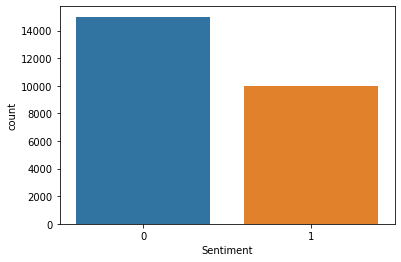

In [13]:
import seaborn as sns

sns.countplot(x='Sentiment', data=data)

In [14]:
#accedo aun comentario
data['Review'][74]

'Whenever I try to use this product, I get complaints from the people I call due to excessive interference.  While the call quality is acceptable on my end, it is bad enough people tell me not to use it or they will hang up.'



---
Separamos en training y test.




In [15]:
X = data.Review
Y = data.Sentiment

In [16]:
from sklearn.model_selection import train_test_split
review = X.values
label = Y.values
review_train, review_test, label_train, label_test = train_test_split(review, label, test_size=0.25, random_state=1000) 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
review_vectorizer = CountVectorizer()
review_vectorizer.fit(review_train)
Xlr_train = review_vectorizer.transform(review_train)
Xlr_test  = review_vectorizer.transform(review_test)
Xlr_train 

<18749x24117 sparse matrix of type '<class 'numpy.int64'>'
	with 836863 stored elements in Compressed Sparse Row format>

Here we can see that the matrix has 750 feature vectors, and each has 1714 dimensions, which is the size of the vocabulary.

Now the data is almost prepared for fitting in the model, lets perform the logistic regression model building and fitting in the data.

In [18]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(Xlr_train, label_train)
score = LRmodel.score(Xlr_test, label_test)
print("Accuracy:", score) 

Accuracy: 0.82288


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




---


# CNN 

  

# Word Embedding 

¿Qué es Word Embedding?

Word Embedding representa la densidad del vector de palabras.
Es una forma diferente de preprocesar los datos. 

Este Embedding puede asignar palabras semánticamente similares. No considera el texto como un lenguaje humano, sino que mapea la estructura de los conjuntos de palabras utilizados en el corpus. 

Su objetivo es mapear las palabras en un espacio geométrico que se denomina espacio de embedding.

ejemplo:

Rey - hombre + mujer = reina 

Keras proporciona un par de métodos para el preprocesamiento de texto y el preprocesamiento de secuencias. Podemos utilizarlos para hacer que nuestros datos se ajusten mejor al modelo TextCNN.

Preparo el Word Embedding para el modelo.


In [22]:
 from keras.preprocessing.text import Tokenizer
 tokenizer = Tokenizer(num_words=5000)
 tokenizer.fit_on_texts(review_train)
 Xcnn_train = tokenizer.texts_to_sequences(review_train)
 Xcnn_test = tokenizer.texts_to_sequences(review_test)
 vocab_size = len(tokenizer.word_index) + 1  
 print(review_train[1])
 print(Xcnn_train[1])

It fits well and will provide some protection I think.  It is not very thick but since the Ipod is usually docked in the house or sync'd in the car it should be just fine.
[2, 196, 56, 5, 45, 816, 96, 356, 3, 200, 2, 7, 13, 26, 1020, 17, 173, 1, 54, 7, 1062, 3316, 12, 1, 788, 29, 12, 1, 89, 2, 182, 25, 34, 142]




---

Se puede ver que las palabras más comunes no tienen un índice grande en nuestro espacio de incrustación. Sin embargo, las palabras muy poco comunes tendrán un valor de índice más alto, que será el recuento de palabras + 1, porque contienen cierta información. 

Aquellas cuya ocurrencia es moderada recibirán un valor de índice moderado. Por último, el valor 0 está reservado y no se proporcionará a ningún texto.

Un problema es que en cada secuencia hay una longitud diferente de palabras, y para especificar la longitud de la secuencia de palabras, necesitamos proporcionar un parámetro maxlen y para resolver esto, necesitamos usar pad_sequence(), que simplemente rellena la secuencia de palabras con ceros.



In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100
Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
print(Xcnn_train[0, :]) 

[   4   11 1879    5    3  192  203    1 2877  127    5  496  315   67
 1424    1  455    5   18   49 1544  745   42   67  219   94    3   20
 2770    4  338    1 3986   18    1 2942  665  271 1058    5 1425    1
 2377 4522    3   45   21    4    6  964    4  643    1 3314    3  505
  326   10 1359  576   17 2415 1256   15   27   19   21  292  405   18
   52  215   19  317  286   46  103  487   10 1377   42   81 1341   19
   45   46 2341    5   46    6  940  455   18   37    1  917    5  674
 1128 3315]


Tras el padding, hemos añadido un valor cero a las matrices y ahora podemos utilizarlas en un modelo de aprendizaje profundo. Así es como el embedding de palabras establece relaciones entre ellas. En el siguiente paso, intentaremos ajustar el modelo TextCNN.

En primer lugar, tenemos que importar sequential y layers.

In [25]:
from keras.models import Sequential
from keras import layers


Creación de modelos usando capas.


In [26]:
embedding_dim = 200
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Dense(10, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
textcnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 200)          5037000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           128128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,166,429
Trainable params: 5,166,429
Non-trainable params: 0
______________________________________________

 Entrenamos el modelo y verificamos la métrica 'accuracy'.


In [27]:
textcnnmodel.fit(Xcnn_train, label_train, epochs=10, verbose=False, validation_data=(Xcnn_test, label_test), batch_size=10)
loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9929
Testing Accuracy:  0.8027


Documentation
https://www.tensorflow.org/tutorials/keras/text_classification